# repeat convolution and multiplication

- Have a probability distribution as a prior
- Have a Gaussian distribution as a noise
- Convolution
- Multiplication (and normalization)
- Repeat


In [1]:
import random
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np

## make one distribution

N: 1000
sum: 0.9999994265729685


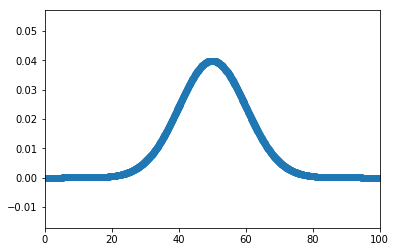

max at 50.0


In [2]:
x_max = 100
x_min = 0
dlt = 0.1
N = int((x_max-x_min)/dlt)
print('N: ' + str(N))
x_axis = [x_min + i * dlt for i in range(N)]

def p(x, mean, sigma):
    return math.exp(-0.5*(x - mean)**2 / sigma / sigma) / math.sqrt(2*math.pi*sigma*sigma)


dist = [p(x, 50, 10) for x in x_axis]
print('sum: ' + str(sum(dist)*dlt))

plt.scatter(x_axis, dist)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(dist)*dlt))


# repeated interactions

In [3]:
n_interactions = 100

# noises

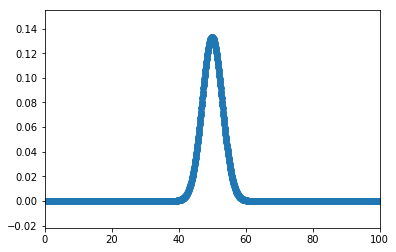

1.000000000000001


In [4]:
noise_sigma = 3
noise_mean = (x_min+x_max)/2.0
p_noise = [p(x, noise_mean, noise_sigma) for x in x_axis]
noise_mean_indx = len(p_noise)//2
plt.scatter(x_axis, p_noise)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p_noise)*dlt)



# Convolution

In [5]:
def conv(p1, p2, position):
    ans = [0] * len(p1)
    for i in range(len(p1)):
        for j in range(len(p2)):
            k = j - i + position
            if 0 <= k and k < len(p2):
                ans[i] += p1[j] * p2[k]
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

# Multiplication

In [6]:
def combine(p1, p2, off = 0):
    ans = []
    for i in range(len(p1)):
        if i + off < 0:
            ans.append(p1[i]*p2[0])
        elif len(p2) <= i + off:
            ans.append(p1[i]*p2[-1])
        else:
            ans.append(p1[i]*p2[i+off])

    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans


# naive with noises

noise mean: 50.0
noise sigma: 3
0 iterations done, noise: 50.846350817322694
10 iterations done, noise: 49.820107734613536
20 iterations done, noise: 52.25856251616113
30 iterations done, noise: 48.25309743418737
40 iterations done, noise: 48.293213814298866
50 iterations done, noise: 44.01699776785272
60 iterations done, noise: 52.0037142448082
70 iterations done, noise: 51.5683840086785
80 iterations done, noise: 50.170285565922114
90 iterations done, noise: 46.12794951651273
1.0


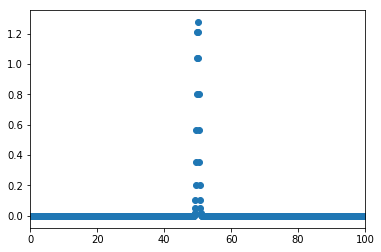

max at 50.0


In [8]:
p = list(dist)

print('noise mean: ' + str(noise_mean))
print('noise sigma: ' + str(noise_sigma))
for i in range(n_interactions):
    p_temp = conv(p, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)
    p = combine(p, p_temp, 0)# int((noise-noise_mean)/dlt+0.5))
    
    if i % 10 == 0:
        print(str(i) + ' iterations done, noise: ' + str(noise))

print(sum(p)*dlt)

plt.scatter(x_axis, p)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p)*dlt))
